# 检测报告分析

## 数据内容：2018年5月 检测报告数据

In [1]:
#coding:utf-8

## 一、预处理

In [2]:
#导入模块
import pandas as pd
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
from pylab import mpl  
#导入自定义函数
import get_city
import short_name
#中文制图设置
matplotlib.matplotlib_fname()
plt.rcParams['font.sans-serif']=['MicrosoftYaHei']
plt.rcParams['axes.unicode_minus']=False

## 二、数据处理

### 1、导入原始数据

In [3]:
raw_data = pd.read_csv('201801.csv')
#raw_data.head(5)

### 2、清洗数据

In [4]:
def reform_data(data):
    #删除重复信息
    drop_dup_data = data.drop_duplicates(keep='first')
    #显示删除情况
    print(u'原有项目记录共{}条，删除重复信息后剩余{}条，重复信息有{}条。'.format(len(data),len(drop_dup_data),len(data)-len(drop_dup_data)))
    
    #通过单位地址检索项目所在城市信息
    city_column = drop_dup_data.loc[:,u'单位地址'].apply(lambda x:get_city.find_city(x))
    add_city_data = pd.concat([drop_dup_data.drop(u'单位地址', axis=1),city_column.to_frame()],axis=1)
    add_city_data.rename(columns={u'单位地址':u'城市'},inplace = True)
    
    #删除原列表中不必要的项（项目编号、报告编号、页面链接）
    drop_unnecc_data = add_city_data.drop([u'项目编号',u'报告编号',u'页面链接'], axis=1)
    
    #将完成日期转化为pandas可识别的time模式
    drop_unnecc_data[u'完成日期']= pd.to_datetime(drop_unnecc_data[u'完成日期'])
    
    return drop_unnecc_data

In [5]:
df = reform_data(raw_data)
#df.head(10)

原有项目记录共3320条，删除重复信息后剩余3320条，重复信息有0条。


* *信息统计*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 6 columns):
项目名称          3320 non-null object
委托单位(建设单位)    3320 non-null object
检测单位          3320 non-null object
检测结论          3320 non-null object
完成日期          3320 non-null datetime64[ns]
城市            3320 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 181.6+ KB


**说明：所有信息皆为有效信息。**

## 三、数据分析

* 定义列统计函数

In [7]:
def count_column(dataframe,column_name):
    #统计列数量
    num = dataframe[column_name].value_counts(normalize=False, sort=True)
    #统计数量百分比
    per = dataframe[column_name].value_counts(normalize=True, sort=True)
    #合并数量与百分比
    column_df = pd.concat([num,per],axis=1)
    #更新表头
    column_df.columns=[u'数量',u'百分比']
    return column_df

### 1、整体统计

> **`检测结论`统计**

In [8]:
count_column(df,u'检测结论')

,数量,百分比
合格,3298,0.993373
不合格,22,0.006627


* **说明：  **
**在总计2591份报告中，2581份为合格报告（99.61%），10份为不合格报告（0.39%）。**

> **`完成日期`统计**

In [9]:
date_df = count_column(df,u'完成日期').sort_index()
date_df

,数量,百分比
2017-12-31,3,0.000904
2018-01-02,131,0.039458
2018-01-03,155,0.046687
2018-01-04,130,0.039157
2018-01-05,118,0.035542
2018-01-06,16,0.004819
2018-01-07,1,0.000301
2018-01-08,148,0.044578
2018-01-09,134,0.040361
2018-01-10,107,0.032229


In [10]:
def print_date_info(dataframe):
    #统计产生报告的天数
    print(u'当月出报告的天数为：{}天。'.format(len(dataframe)))
    #统计平均每天报告数量
    print(u'平均每天产生报告{}份。'.format(int(dataframe[u'数量'].mean())))
    #统计产生最多报告的天数
    print(u'在日期：{}，产生当月最多报告，共{}份。'.format(str(dataframe[u'数量'].idxmax()),int(dataframe[u'数量'].max())))
    #统计产生最少报告的天数
    print(u'在日期：{}，产生当月最少报告，共{}份。'.format(str(dataframe[u'数量'].idxmin()),int(dataframe[u'数量'].min())))

In [11]:
print_date_info(date_df)

当月出报告的天数为：32天。
平均每天产生报告103份。
在日期：2018-01-25 00:00:00，产生当月最多报告，共176份。
在日期：2018-01-07 00:00:00，产生当月最少报告，共1份。


> **`完成日期` vs `报告数量` 图表**

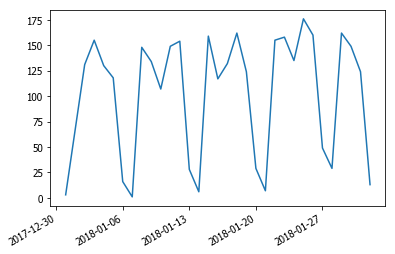

In [12]:
date_df.loc[:,u'数量'].plot(kind='line')

**说明：  
1、工作日期间，每周起始（周一）与每周结束（周五）的时间产生报告较多，其中时间（周二、周三、周四）产生报告较少，见图表每个波峰逞“凹形”；  
2、周末时间一般不产生或极少产生报告，见图表规律性波谷；  
3、临近月底，报告的产生数量有增加趋势。**

> **`检测单位`统计**

In [13]:
dc_df = count_column(df,u'检测单位') #dc for detection company
dc_df

,数量,百分比
广东穗安科技检测中心有限公司,315,0.094880
广东华建电气消防安全检测有限公司,241,0.072590
广东诺安消防技术服务有限公司,238,0.071687
广东为邦消防检测有限公司,226,0.068072
广东华标检测中心有限公司,218,0.065663
广东鸿榆消防检测技术服务有限公司,162,0.048795
广州市泰昌消防工程有限公司,159,0.047892
广州远耀技术服务有限公司,149,0.044880
广东鸿盛消防设施检测维保有限公司,141,0.042470
广东宏希工程检测有限公司,133,0.040060


In [14]:
print(u'总计共{}家单位在本月内出具了检测报告。'.format(len(dc_df)))

总计共33家单位在本月内出具了检测报告。


**报告数量排名前十的单位：**

In [15]:
dc_df.head(10)

,数量,百分比
广东穗安科技检测中心有限公司,315,0.094880
广东华建电气消防安全检测有限公司,241,0.072590
广东诺安消防技术服务有限公司,238,0.071687
广东为邦消防检测有限公司,226,0.068072
广东华标检测中心有限公司,218,0.065663
广东鸿榆消防检测技术服务有限公司,162,0.048795
广州市泰昌消防工程有限公司,159,0.047892
广州远耀技术服务有限公司,149,0.044880
广东鸿盛消防设施检测维保有限公司,141,0.042470
广东宏希工程检测有限公司,133,0.040060


**报告数量排名倒数前十的单位：**

In [16]:
dc_df.tail(10)

,数量,百分比
深圳汇安消防设施工程有限公司,51,0.015361
佛山市中安电力消防科技工程有限公司,37,0.011145
广东珠江燃气集团股份有限公司,28,0.008434
广州新利堡消防工程企业有限公司,26,0.007831
广东华安消防技术服务有限公司,24,0.007229
广东广消消防实业有限公司,23,0.006928
广东中业消防技术有限公司,20,0.006024
广东为众消防科技股份有限公司,6,0.001807
广东正标工程检测有限公司,6,0.001807
广东恒迅建设集团有限公司,5,0.001506


图表

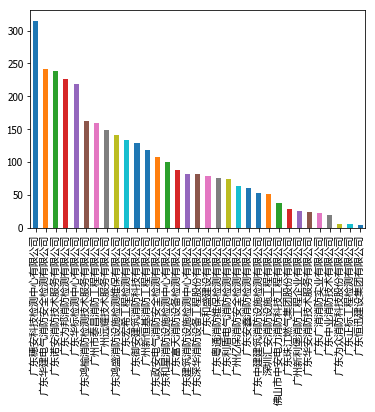

In [17]:
dc_df.loc[:,u'数量'].plot(kind='bar')

> **`城市`统计**

In [18]:
city_df = count_column(df,u'城市')
city_df

,数量,百分比
广州,654,0.196988
NA,559,0.168373
佛山,476,0.143373
东莞,474,0.142771
惠州,209,0.062952
中山,203,0.061145
珠海,128,0.038554
江门,76,0.022892
清远,69,0.020783
梅州,64,0.019277


***说明：NA表示城市未能确定的数据。***

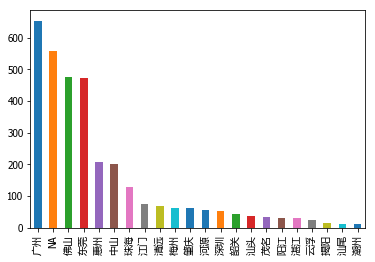

In [19]:
city_df.loc[:,u'数量'].plot(kind='bar')

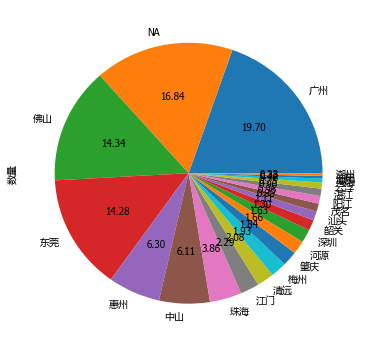

In [20]:
city_df.loc[:,u'数量'].plot(kind='pie',autopct='%.2f', figsize=(6, 6))

**说明：广州、东莞、佛山三个地方的报告产生数量明显多于其他地区。**

### 2、个体统计

### 广东政安电气消防安全检测有限公司

In [21]:
#单个检测公司数据统计
ZhengAn_df = df.loc[df[u'检测单位'] == '广东穗安科技检测中心有限公司']
#ZhengAn_df

> **`完成日期`统计**

In [22]:
ZhengAn_date_df = count_column(ZhengAn_df,u'完成日期').sort_index()
ZhengAn_date_df

,数量,百分比
2018-01-02,22,0.069841
2018-01-03,20,0.063492
2018-01-04,13,0.041270
2018-01-05,18,0.057143
2018-01-08,8,0.025397
2018-01-09,6,0.019048
2018-01-10,1,0.003175
2018-01-11,5,0.015873
2018-01-12,13,0.041270
2018-01-13,6,0.019048


In [23]:
print_date_info(ZhengAn_date_df)

当月出报告的天数为：25天。
平均每天产生报告12份。
在日期：2018-01-15 00:00:00，产生当月最多报告，共27份。
在日期：2018-01-10 00:00:00，产生当月最少报告，共1份。


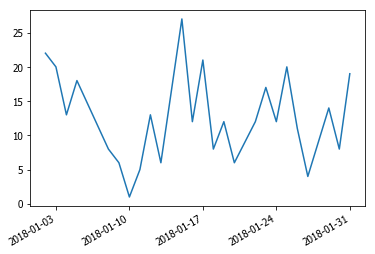

In [24]:
ZhengAn_date_df.loc[:,u'数量'].plot(kind='line')

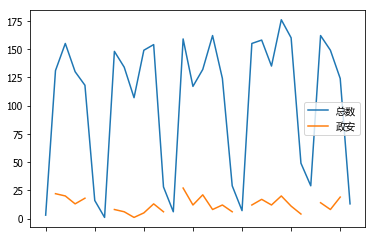

In [25]:
total_df = date_df.rename(index=str, columns={"数量": "总数"})
solo_df = ZhengAn_date_df.rename(index=str, columns={"数量": "政安"})
pd.concat([total_df,solo_df],axis=1,sort=True).iloc[:,[0,2]].plot(kind='line')

**说明：5月内政安每日产生报告数与总体每日产生报告数之间的对比。**

> **`城市`统计**

In [26]:
ZhengAn_city_df = count_column(ZhengAn_df,u'城市')
ZhengAn_city_df

,数量,百分比
东莞,108,0.342857
佛山,84,0.266667
广州,66,0.209524
NA,17,0.053968
惠州,11,0.034921
汕头,11,0.034921
肇庆,6,0.019048
中山,5,0.015873
湛江,3,0.009524
深圳,2,0.006349


**说明：项目集中在广州、东莞、中山三个地区，其中广州的数量最多。**

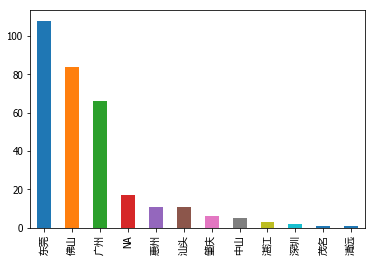

In [27]:
ZhengAn_city_df.loc[:,u'数量'].plot(kind='bar')

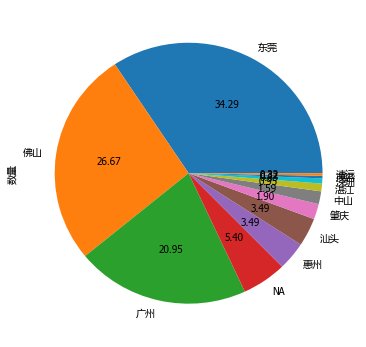

In [28]:
ZhengAn_city_df.loc[:,u'数量'].plot(kind='pie',autopct='%.2f', figsize=(6, 6))

In [29]:
print(u'当月的合作单位共有{}家。'.format(len(count_column(ZhengAn_df,u'委托单位(建设单位)'))))
count_column(ZhengAn_df,u'委托单位(建设单位)').head(10)

当月的合作单位共有288家。


,数量,百分比
永旺梦乐城（佛山南海）商业管理有限公司,6,0.019048
佛山普丰仓储经营有限公司,6,0.019048
德庆县播植镇星悦酒店,2,0.006349
肇庆市高新区金海岸房地产有限公司,2,0.006349
广东长达建筑消防工程有限公司,2,0.006349
广东依明机械科技有限公司,2,0.006349
清远欧派集成家居有限公司,2,0.006349
深圳市欧芮歌服饰有限公司,2,0.006349
东莞东兴花园开发有限公司,2,0.006349
惠州市德赛电池有限公司,2,0.006349


**说明：5月中，与总计84个委托单位合作。其中与`广东省路桥建设发展有限公司汕湛分公司`和`南方医科大学`的合作最为密切。**